In [1]:
import numpy as np
import tensorflow as tf
import tensorflow.keras as keras
import tensorflow.keras.models as models
import tensorflow.keras.layers as layers
import matplotlib.pyplot as plt
import tensorflow.keras.optimizers as optimizers
from tensorflow.keras.utils import *

tf.__version__
keras.__version__


'2.4.0'

In [3]:
import tensorflow.keras.datasets.boston_housing as bhousing
(train_data, train_targets), (test_data, test_targets) = bhousing.load_data()

In [4]:
train_data[0]
train_targets[0]

array([  1.23247,   0.     ,   8.14   ,   0.     ,   0.538  ,   6.142  ,
        91.7    ,   3.9769 ,   4.     , 307.     ,  21.     , 396.9    ,
        18.72   ])

In [6]:
mean = train_data.mean(axis=0)
std = train_data.std(axis=0)
train_data -= mean
train_data /= std
test_data -= mean
test_data /= std

In [8]:
len(train_data[0])


13

In [45]:
def build_model():
    model = keras.Sequential()
    model.add(layers.Dense(100,activation='sigmoid',input_shape=(13,)))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop',loss='mse', metrics=['mae'])
    return model

In [47]:
#k折验证
k = 4
epochs_num = 500
num_val_per_sample = len(train_data) // k
train_mae = []
test_mae = []
for i in range(k):
    val_data = train_data[i*num_val_per_sample : (i+1)*num_val_per_sample]
    val_targets = train_targets[i*num_val_per_sample : (i+1)*num_val_per_sample]
    tmp_train_data = np.concatenate([train_data[0:i*num_val_per_sample],
                                    train_data[(i+1)*num_val_per_sample:]],
                                    axis = 0)
    tmp_train_targets = np.concatenate([train_targets[0:i*num_val_per_sample],
                                    train_targets[(i+1)*num_val_per_sample:]],
                                    axis = 0)
    model = build_model()
    fit_result = model.fit(train_data, train_targets,
                           epochs=epochs_num, 
                           validation_data=(test_data, test_targets))
    train_result = fit_result.history
    train_mae.append(train_result['mae'])
    test_mae.append(train_result['val_mae'])

Epoch 1/500
13/13 [==============================] - 0s 8ms/step - loss: 530.7551 - mae: 21.2215 - val_loss: 533.9935 - val_mae: 21.3670
Epoch 2/500
13/13 [==============================] - 0s 2ms/step - loss: 491.8469 - mae: 20.3575 - val_loss: 499.0500 - val_mae: 20.6002
Epoch 3/500
13/13 [==============================] - 0s 3ms/step - loss: 460.3996 - mae: 19.6316 - val_loss: 467.2062 - val_mae: 19.8745
Epoch 4/500
13/13 [==============================] - 0s 3ms/step - loss: 431.2091 - mae: 18.9313 - val_loss: 437.5305 - val_mae: 19.1722
Epoch 5/500
13/13 [==============================] - 0s 3ms/step - loss: 403.2490 - mae: 18.2406 - val_loss: 408.6889 - val_mae: 18.4625
Epoch 6/500
13/13 [==============================] - 0s 3ms/step - loss: 376.3056 - mae: 17.5408 - val_loss: 380.6076 - val_mae: 17.7497
Epoch 7/500
13/13 [==============================] - 0s 3ms/step - loss: 350.2853 - mae: 16.8476 - val_loss: 353.7228 - val_mae: 17.0383
Epoch 8/500
13/13 [======================

13/13 [==============================] - 0s 3ms/step - loss: 24.2882 - mae: 3.3989 - val_loss: 22.5161 - val_mae: 3.4431
Epoch 62/500
13/13 [==============================] - 0s 2ms/step - loss: 24.1779 - mae: 3.4134 - val_loss: 22.5777 - val_mae: 3.4426
Epoch 63/500
13/13 [==============================] - 0s 3ms/step - loss: 24.0788 - mae: 3.4063 - val_loss: 22.3124 - val_mae: 3.4317
Epoch 64/500
13/13 [==============================] - 0s 2ms/step - loss: 24.0346 - mae: 3.3743 - val_loss: 22.3056 - val_mae: 3.4367
Epoch 65/500
13/13 [==============================] - 0s 2ms/step - loss: 23.9411 - mae: 3.3803 - val_loss: 22.3511 - val_mae: 3.4451
Epoch 66/500
13/13 [==============================] - 0s 2ms/step - loss: 23.8302 - mae: 3.3785 - val_loss: 22.3051 - val_mae: 3.4504
Epoch 67/500
13/13 [==============================] - 0s 2ms/step - loss: 23.7297 - mae: 3.4056 - val_loss: 22.4029 - val_mae: 3.4370
Epoch 68/500
13/13 [==============================] - 0s 2ms/step - loss: 2

13/13 [==============================] - 0s 3ms/step - loss: 20.3550 - mae: 3.2157 - val_loss: 23.0499 - val_mae: 3.4941
Epoch 123/500
13/13 [==============================] - 0s 2ms/step - loss: 20.3344 - mae: 3.2336 - val_loss: 22.8576 - val_mae: 3.4760
Epoch 124/500
13/13 [==============================] - 0s 2ms/step - loss: 20.2662 - mae: 3.2075 - val_loss: 22.9775 - val_mae: 3.4925
Epoch 125/500
13/13 [==============================] - 0s 3ms/step - loss: 20.2028 - mae: 3.2015 - val_loss: 23.1205 - val_mae: 3.5120
Epoch 126/500
13/13 [==============================] - 0s 2ms/step - loss: 20.1901 - mae: 3.2229 - val_loss: 23.0786 - val_mae: 3.4988
Epoch 127/500
13/13 [==============================] - 0s 2ms/step - loss: 20.1021 - mae: 3.2208 - val_loss: 23.1310 - val_mae: 3.4974
Epoch 128/500
13/13 [==============================] - 0s 2ms/step - loss: 20.0790 - mae: 3.2002 - val_loss: 23.0907 - val_mae: 3.5010
Epoch 129/500
13/13 [==============================] - 0s 2ms/step - 

Epoch 183/500
13/13 [==============================] - 0s 2ms/step - loss: 17.7699 - mae: 3.0259 - val_loss: 22.6405 - val_mae: 3.4431
Epoch 184/500
13/13 [==============================] - 0s 3ms/step - loss: 17.7286 - mae: 3.0291 - val_loss: 22.5981 - val_mae: 3.4408
Epoch 185/500
13/13 [==============================] - 0s 3ms/step - loss: 17.6572 - mae: 3.0300 - val_loss: 22.7264 - val_mae: 3.4439
Epoch 186/500
13/13 [==============================] - 0s 2ms/step - loss: 17.6441 - mae: 3.0294 - val_loss: 22.7357 - val_mae: 3.4432
Epoch 187/500
13/13 [==============================] - 0s 2ms/step - loss: 17.6273 - mae: 3.0117 - val_loss: 22.8298 - val_mae: 3.4529
Epoch 188/500
13/13 [==============================] - 0s 2ms/step - loss: 17.6039 - mae: 3.0007 - val_loss: 22.8363 - val_mae: 3.4552
Epoch 189/500
13/13 [==============================] - 0s 3ms/step - loss: 17.5336 - mae: 3.0193 - val_loss: 23.0564 - val_mae: 3.4651
Epoch 190/500
13/13 [==============================] - 

Epoch 244/500
13/13 [==============================] - 0s 3ms/step - loss: 15.6053 - mae: 2.8530 - val_loss: 22.2161 - val_mae: 3.3738
Epoch 245/500
13/13 [==============================] - 0s 3ms/step - loss: 15.5294 - mae: 2.8487 - val_loss: 22.3293 - val_mae: 3.3748
Epoch 246/500
13/13 [==============================] - 0s 2ms/step - loss: 15.4886 - mae: 2.8310 - val_loss: 22.3488 - val_mae: 3.3865
Epoch 247/500
13/13 [==============================] - 0s 2ms/step - loss: 15.4612 - mae: 2.8541 - val_loss: 22.2741 - val_mae: 3.3655
Epoch 248/500
13/13 [==============================] - 0s 2ms/step - loss: 15.4592 - mae: 2.8264 - val_loss: 22.3890 - val_mae: 3.3802
Epoch 249/500
13/13 [==============================] - 0s 2ms/step - loss: 15.4111 - mae: 2.8367 - val_loss: 22.3922 - val_mae: 3.3780
Epoch 250/500
13/13 [==============================] - 0s 2ms/step - loss: 15.3851 - mae: 2.8295 - val_loss: 22.2317 - val_mae: 3.3672
Epoch 251/500
13/13 [==============================] - 

Epoch 305/500
13/13 [==============================] - 0s 3ms/step - loss: 13.4946 - mae: 2.6641 - val_loss: 21.5720 - val_mae: 3.2419
Epoch 306/500
13/13 [==============================] - 0s 3ms/step - loss: 13.4813 - mae: 2.6541 - val_loss: 21.4535 - val_mae: 3.2288
Epoch 307/500
13/13 [==============================] - 0s 2ms/step - loss: 13.4421 - mae: 2.6470 - val_loss: 21.3661 - val_mae: 3.2249
Epoch 308/500
13/13 [==============================] - 0s 2ms/step - loss: 13.4027 - mae: 2.6568 - val_loss: 21.5154 - val_mae: 3.2212
Epoch 309/500
13/13 [==============================] - 0s 2ms/step - loss: 13.3469 - mae: 2.6393 - val_loss: 21.6608 - val_mae: 3.2360
Epoch 310/500
13/13 [==============================] - 0s 2ms/step - loss: 13.3394 - mae: 2.6405 - val_loss: 21.7169 - val_mae: 3.2443
Epoch 311/500
13/13 [==============================] - 0s 3ms/step - loss: 13.2883 - mae: 2.6463 - val_loss: 21.4514 - val_mae: 3.2278
Epoch 312/500
13/13 [==============================] - 

Epoch 366/500
13/13 [==============================] - 0s 3ms/step - loss: 11.6073 - mae: 2.4737 - val_loss: 20.8739 - val_mae: 3.0897
Epoch 367/500
13/13 [==============================] - 0s 3ms/step - loss: 11.5569 - mae: 2.4698 - val_loss: 20.6366 - val_mae: 3.0746
Epoch 368/500
13/13 [==============================] - 0s 2ms/step - loss: 11.5372 - mae: 2.4500 - val_loss: 20.9438 - val_mae: 3.0907
Epoch 369/500
13/13 [==============================] - 0s 2ms/step - loss: 11.5002 - mae: 2.4621 - val_loss: 20.6701 - val_mae: 3.0702
Epoch 370/500
13/13 [==============================] - 0s 3ms/step - loss: 11.4672 - mae: 2.4465 - val_loss: 20.8892 - val_mae: 3.0847
Epoch 371/500
13/13 [==============================] - 0s 2ms/step - loss: 11.4484 - mae: 2.4472 - val_loss: 20.8695 - val_mae: 3.0829
Epoch 372/500
13/13 [==============================] - 0s 2ms/step - loss: 11.4266 - mae: 2.4548 - val_loss: 20.5599 - val_mae: 3.0620
Epoch 373/500
13/13 [==============================] - 

13/13 [==============================] - 0s 3ms/step - loss: 10.0352 - mae: 2.3024 - val_loss: 20.5763 - val_mae: 2.9989
Epoch 427/500
13/13 [==============================] - 0s 3ms/step - loss: 10.0158 - mae: 2.3079 - val_loss: 20.4539 - val_mae: 2.9917
Epoch 428/500
13/13 [==============================] - 0s 2ms/step - loss: 9.9797 - mae: 2.2967 - val_loss: 20.4021 - val_mae: 2.9831
Epoch 429/500
13/13 [==============================] - 0s 2ms/step - loss: 9.9891 - mae: 2.3033 - val_loss: 20.4626 - val_mae: 2.9852
Epoch 430/500
13/13 [==============================] - 0s 2ms/step - loss: 9.9669 - mae: 2.3030 - val_loss: 20.5770 - val_mae: 2.9988
Epoch 431/500
13/13 [==============================] - 0s 2ms/step - loss: 9.8960 - mae: 2.2918 - val_loss: 20.0686 - val_mae: 2.9631
Epoch 432/500
13/13 [==============================] - 0s 2ms/step - loss: 9.8860 - mae: 2.2938 - val_loss: 20.1121 - val_mae: 2.9658
Epoch 433/500
13/13 [==============================] - 0s 3ms/step - loss:

13/13 [==============================] - 0s 3ms/step - loss: 8.8690 - mae: 2.1672 - val_loss: 20.1711 - val_mae: 2.9317
Epoch 488/500
13/13 [==============================] - 0s 3ms/step - loss: 8.8229 - mae: 2.1533 - val_loss: 20.4508 - val_mae: 2.9438
Epoch 489/500
13/13 [==============================] - 0s 2ms/step - loss: 8.8182 - mae: 2.1657 - val_loss: 20.5513 - val_mae: 2.9493
Epoch 490/500
13/13 [==============================] - 0s 3ms/step - loss: 8.8338 - mae: 2.1736 - val_loss: 20.2997 - val_mae: 2.9204
Epoch 491/500
13/13 [==============================] - 0s 2ms/step - loss: 8.7704 - mae: 2.1582 - val_loss: 20.6106 - val_mae: 2.9585
Epoch 492/500
13/13 [==============================] - 0s 2ms/step - loss: 8.7840 - mae: 2.1589 - val_loss: 20.6866 - val_mae: 2.9700
Epoch 493/500
13/13 [==============================] - 0s 2ms/step - loss: 8.7245 - mae: 2.1491 - val_loss: 20.2121 - val_mae: 2.9117
Epoch 494/500
13/13 [==============================] - 0s 2ms/step - loss: 8

Epoch 48/500
13/13 [==============================] - 0s 3ms/step - loss: 26.5095 - mae: 3.5004 - val_loss: 22.9696 - val_mae: 3.4750
Epoch 49/500
13/13 [==============================] - 0s 3ms/step - loss: 26.3632 - mae: 3.5003 - val_loss: 22.9256 - val_mae: 3.4746
Epoch 50/500
13/13 [==============================] - 0s 3ms/step - loss: 26.1127 - mae: 3.5082 - val_loss: 22.8336 - val_mae: 3.4575
Epoch 51/500
13/13 [==============================] - 0s 2ms/step - loss: 25.9408 - mae: 3.4838 - val_loss: 22.8145 - val_mae: 3.4509
Epoch 52/500
13/13 [==============================] - 0s 3ms/step - loss: 25.7867 - mae: 3.4800 - val_loss: 22.7552 - val_mae: 3.4419
Epoch 53/500
13/13 [==============================] - 0s 2ms/step - loss: 25.5928 - mae: 3.4549 - val_loss: 22.7552 - val_mae: 3.4469
Epoch 54/500
13/13 [==============================] - 0s 2ms/step - loss: 25.4818 - mae: 3.4399 - val_loss: 22.6718 - val_mae: 3.4540
Epoch 55/500
13/13 [==============================] - 0s 2ms/s

13/13 [==============================] - 0s 3ms/step - loss: 21.1094 - mae: 3.2566 - val_loss: 22.9277 - val_mae: 3.4931
Epoch 110/500
13/13 [==============================] - 0s 2ms/step - loss: 21.0740 - mae: 3.2624 - val_loss: 22.7898 - val_mae: 3.4926
Epoch 111/500
13/13 [==============================] - 0s 2ms/step - loss: 20.9317 - mae: 3.2841 - val_loss: 22.8522 - val_mae: 3.4750
Epoch 112/500
13/13 [==============================] - 0s 2ms/step - loss: 20.9825 - mae: 3.2525 - val_loss: 22.8076 - val_mae: 3.4791
Epoch 113/500
13/13 [==============================] - 0s 3ms/step - loss: 20.8804 - mae: 3.2467 - val_loss: 23.0659 - val_mae: 3.4908
Epoch 114/500
13/13 [==============================] - 0s 2ms/step - loss: 20.8587 - mae: 3.2580 - val_loss: 22.9341 - val_mae: 3.4850
Epoch 115/500
13/13 [==============================] - 0s 2ms/step - loss: 20.7729 - mae: 3.2536 - val_loss: 23.2158 - val_mae: 3.4956
Epoch 116/500
13/13 [==============================] - 0s 3ms/step - 

Epoch 170/500
13/13 [==============================] - 0s 3ms/step - loss: 18.3293 - mae: 3.0950 - val_loss: 22.9949 - val_mae: 3.4760
Epoch 171/500
13/13 [==============================] - 0s 3ms/step - loss: 18.2918 - mae: 3.0846 - val_loss: 22.8123 - val_mae: 3.4586
Epoch 172/500
13/13 [==============================] - 0s 2ms/step - loss: 18.2762 - mae: 3.0686 - val_loss: 22.9692 - val_mae: 3.4721
Epoch 173/500
13/13 [==============================] - 0s 2ms/step - loss: 18.2308 - mae: 3.0748 - val_loss: 23.2090 - val_mae: 3.4850
Epoch 174/500
13/13 [==============================] - 0s 2ms/step - loss: 18.2016 - mae: 3.0689 - val_loss: 22.9973 - val_mae: 3.4759
Epoch 175/500
13/13 [==============================] - 0s 2ms/step - loss: 18.1615 - mae: 3.0774 - val_loss: 22.9594 - val_mae: 3.4716
Epoch 176/500
13/13 [==============================] - 0s 2ms/step - loss: 18.1038 - mae: 3.0762 - val_loss: 22.8074 - val_mae: 3.4564
Epoch 177/500
13/13 [==============================] - 

Epoch 231/500
13/13 [==============================] - 0s 2ms/step - loss: 16.0781 - mae: 2.8882 - val_loss: 22.4836 - val_mae: 3.4032
Epoch 232/500
13/13 [==============================] - 0s 2ms/step - loss: 16.0616 - mae: 2.8928 - val_loss: 22.4808 - val_mae: 3.3998
Epoch 233/500
13/13 [==============================] - 0s 2ms/step - loss: 16.0261 - mae: 2.8893 - val_loss: 22.5292 - val_mae: 3.4020
Epoch 234/500
13/13 [==============================] - 0s 2ms/step - loss: 15.9865 - mae: 2.8933 - val_loss: 22.2646 - val_mae: 3.3807
Epoch 235/500
13/13 [==============================] - 0s 2ms/step - loss: 15.9334 - mae: 2.8786 - val_loss: 22.6293 - val_mae: 3.4033
Epoch 236/500
13/13 [==============================] - 0s 2ms/step - loss: 15.9428 - mae: 2.8707 - val_loss: 22.6227 - val_mae: 3.4096
Epoch 237/500
13/13 [==============================] - 0s 2ms/step - loss: 15.8300 - mae: 2.8801 - val_loss: 22.5895 - val_mae: 3.4027
Epoch 238/500
13/13 [==============================] - 

Epoch 292/500
13/13 [==============================] - 0s 2ms/step - loss: 14.0063 - mae: 2.6972 - val_loss: 21.7179 - val_mae: 3.2665
Epoch 293/500
13/13 [==============================] - 0s 3ms/step - loss: 13.9539 - mae: 2.7026 - val_loss: 21.6169 - val_mae: 3.2594
Epoch 294/500
13/13 [==============================] - 0s 3ms/step - loss: 13.9738 - mae: 2.6892 - val_loss: 21.3373 - val_mae: 3.2445
Epoch 295/500
13/13 [==============================] - 0s 2ms/step - loss: 13.8755 - mae: 2.6830 - val_loss: 21.5135 - val_mae: 3.2574
Epoch 296/500
13/13 [==============================] - 0s 2ms/step - loss: 13.8431 - mae: 2.6959 - val_loss: 21.4263 - val_mae: 3.2402
Epoch 297/500
13/13 [==============================] - 0s 2ms/step - loss: 13.8277 - mae: 2.6875 - val_loss: 21.2456 - val_mae: 3.2323
Epoch 298/500
13/13 [==============================] - 0s 2ms/step - loss: 13.7766 - mae: 2.6785 - val_loss: 21.4469 - val_mae: 3.2360
Epoch 299/500
13/13 [==============================] - 

Epoch 353/500
13/13 [==============================] - 0s 3ms/step - loss: 12.0123 - mae: 2.5060 - val_loss: 21.0121 - val_mae: 3.1221
Epoch 354/500
13/13 [==============================] - 0s 2ms/step - loss: 11.9739 - mae: 2.5031 - val_loss: 20.8053 - val_mae: 3.1078
Epoch 355/500
13/13 [==============================] - 0s 2ms/step - loss: 11.9742 - mae: 2.5092 - val_loss: 20.9014 - val_mae: 3.1110
Epoch 356/500
13/13 [==============================] - 0s 2ms/step - loss: 11.9717 - mae: 2.5083 - val_loss: 20.6784 - val_mae: 3.0947
Epoch 357/500
13/13 [==============================] - 0s 3ms/step - loss: 11.8925 - mae: 2.4963 - val_loss: 20.8274 - val_mae: 3.1001
Epoch 358/500
13/13 [==============================] - 0s 2ms/step - loss: 11.8796 - mae: 2.5008 - val_loss: 20.5767 - val_mae: 3.0839
Epoch 359/500
13/13 [==============================] - 0s 2ms/step - loss: 11.8530 - mae: 2.4963 - val_loss: 20.5661 - val_mae: 3.0814
Epoch 360/500
13/13 [==============================] - 

Epoch 414/500
13/13 [==============================] - 0s 2ms/step - loss: 10.3199 - mae: 2.3349 - val_loss: 20.2810 - val_mae: 2.9788
Epoch 415/500
13/13 [==============================] - 0s 2ms/step - loss: 10.2656 - mae: 2.3373 - val_loss: 20.3387 - val_mae: 2.9812
Epoch 416/500
13/13 [==============================] - 0s 3ms/step - loss: 10.2575 - mae: 2.3361 - val_loss: 20.3358 - val_mae: 2.9782
Epoch 417/500
13/13 [==============================] - 0s 2ms/step - loss: 10.2281 - mae: 2.3297 - val_loss: 20.1019 - val_mae: 2.9625
Epoch 418/500
13/13 [==============================] - 0s 3ms/step - loss: 10.2075 - mae: 2.3292 - val_loss: 20.1924 - val_mae: 2.9666
Epoch 419/500
13/13 [==============================] - 0s 2ms/step - loss: 10.1970 - mae: 2.3228 - val_loss: 20.2914 - val_mae: 2.9718
Epoch 420/500
13/13 [==============================] - 0s 2ms/step - loss: 10.1514 - mae: 2.3232 - val_loss: 19.9718 - val_mae: 2.9496
Epoch 421/500
13/13 [==============================] - 

13/13 [==============================] - 0s 3ms/step - loss: 9.0550 - mae: 2.1843 - val_loss: 20.3268 - val_mae: 2.9097
Epoch 476/500
13/13 [==============================] - 0s 3ms/step - loss: 9.0372 - mae: 2.1871 - val_loss: 20.2289 - val_mae: 2.9025
Epoch 477/500
13/13 [==============================] - 0s 2ms/step - loss: 9.0697 - mae: 2.1832 - val_loss: 20.1582 - val_mae: 2.8981
Epoch 478/500
13/13 [==============================] - 0s 2ms/step - loss: 9.0456 - mae: 2.1944 - val_loss: 19.9330 - val_mae: 2.8756
Epoch 479/500
13/13 [==============================] - 0s 2ms/step - loss: 8.9650 - mae: 2.1807 - val_loss: 20.0927 - val_mae: 2.8892
Epoch 480/500
13/13 [==============================] - 0s 2ms/step - loss: 8.9857 - mae: 2.1818 - val_loss: 20.3386 - val_mae: 2.9171
Epoch 481/500
13/13 [==============================] - 0s 2ms/step - loss: 8.9788 - mae: 2.1792 - val_loss: 20.2178 - val_mae: 2.9014
Epoch 482/500
13/13 [==============================] - 0s 3ms/step - loss: 8

Epoch 36/500
13/13 [==============================] - 0s 2ms/step - loss: 30.1407 - mae: 3.7022 - val_loss: 25.4401 - val_mae: 3.6702
Epoch 37/500
13/13 [==============================] - 0s 2ms/step - loss: 29.6164 - mae: 3.6839 - val_loss: 25.0735 - val_mae: 3.6394
Epoch 38/500
13/13 [==============================] - 0s 2ms/step - loss: 29.1708 - mae: 3.6494 - val_loss: 24.7901 - val_mae: 3.6064
Epoch 39/500
13/13 [==============================] - 0s 2ms/step - loss: 28.7180 - mae: 3.6306 - val_loss: 24.4515 - val_mae: 3.5763
Epoch 40/500
13/13 [==============================] - 0s 2ms/step - loss: 28.3741 - mae: 3.6066 - val_loss: 24.1759 - val_mae: 3.5529
Epoch 41/500
13/13 [==============================] - 0s 2ms/step - loss: 28.1242 - mae: 3.5800 - val_loss: 24.0198 - val_mae: 3.5478
Epoch 42/500
13/13 [==============================] - 0s 2ms/step - loss: 27.7800 - mae: 3.5524 - val_loss: 23.7554 - val_mae: 3.5316
Epoch 43/500
13/13 [==============================] - 0s 2ms/s

13/13 [==============================] - 0s 2ms/step - loss: 21.5806 - mae: 3.2998 - val_loss: 22.6248 - val_mae: 3.4795
Epoch 98/500
13/13 [==============================] - 0s 2ms/step - loss: 21.5070 - mae: 3.2980 - val_loss: 22.5758 - val_mae: 3.4667
Epoch 99/500
13/13 [==============================] - 0s 2ms/step - loss: 21.4412 - mae: 3.2722 - val_loss: 22.9648 - val_mae: 3.4902
Epoch 100/500
13/13 [==============================] - 0s 2ms/step - loss: 21.3777 - mae: 3.2773 - val_loss: 22.7750 - val_mae: 3.4789
Epoch 101/500
13/13 [==============================] - 0s 2ms/step - loss: 21.3218 - mae: 3.2840 - val_loss: 22.8848 - val_mae: 3.4802
Epoch 102/500
13/13 [==============================] - 0s 2ms/step - loss: 21.2885 - mae: 3.2658 - val_loss: 22.8138 - val_mae: 3.4771
Epoch 103/500
13/13 [==============================] - 0s 2ms/step - loss: 21.2153 - mae: 3.2681 - val_loss: 22.7569 - val_mae: 3.4794
Epoch 104/500
13/13 [==============================] - 0s 2ms/step - lo

Epoch 158/500
13/13 [==============================] - 0s 2ms/step - loss: 18.5412 - mae: 3.0907 - val_loss: 22.8847 - val_mae: 3.4762
Epoch 159/500
13/13 [==============================] - 0s 2ms/step - loss: 18.3916 - mae: 3.1010 - val_loss: 23.0658 - val_mae: 3.4835
Epoch 160/500
13/13 [==============================] - 0s 2ms/step - loss: 18.3904 - mae: 3.0805 - val_loss: 22.9161 - val_mae: 3.4781
Epoch 161/500
13/13 [==============================] - 0s 2ms/step - loss: 18.3656 - mae: 3.1020 - val_loss: 22.8422 - val_mae: 3.4630
Epoch 162/500
13/13 [==============================] - 0s 2ms/step - loss: 18.2937 - mae: 3.0834 - val_loss: 23.0115 - val_mae: 3.4738
Epoch 163/500
13/13 [==============================] - 0s 2ms/step - loss: 18.2623 - mae: 3.0720 - val_loss: 22.9200 - val_mae: 3.4693
Epoch 164/500
13/13 [==============================] - 0s 2ms/step - loss: 18.2039 - mae: 3.0668 - val_loss: 22.6939 - val_mae: 3.4569
Epoch 165/500
13/13 [==============================] - 

Epoch 219/500
13/13 [==============================] - 0s 2ms/step - loss: 16.1329 - mae: 2.9086 - val_loss: 22.4169 - val_mae: 3.4125
Epoch 220/500
13/13 [==============================] - 0s 2ms/step - loss: 16.1119 - mae: 2.9014 - val_loss: 22.3259 - val_mae: 3.4014
Epoch 221/500
13/13 [==============================] - 0s 2ms/step - loss: 16.0834 - mae: 2.8930 - val_loss: 22.4462 - val_mae: 3.4141
Epoch 222/500
13/13 [==============================] - 0s 2ms/step - loss: 16.0413 - mae: 2.9043 - val_loss: 22.5650 - val_mae: 3.4153
Epoch 223/500
13/13 [==============================] - 0s 3ms/step - loss: 16.0397 - mae: 2.8926 - val_loss: 22.3564 - val_mae: 3.4039
Epoch 224/500
13/13 [==============================] - 0s 3ms/step - loss: 15.9594 - mae: 2.8800 - val_loss: 22.4274 - val_mae: 3.4129
Epoch 225/500
13/13 [==============================] - 0s 2ms/step - loss: 15.9209 - mae: 2.8821 - val_loss: 22.5402 - val_mae: 3.4189
Epoch 226/500
13/13 [==============================] - 

Epoch 280/500
13/13 [==============================] - 0s 3ms/step - loss: 14.0551 - mae: 2.7206 - val_loss: 21.4448 - val_mae: 3.2660
Epoch 281/500
13/13 [==============================] - 0s 2ms/step - loss: 14.0108 - mae: 2.7120 - val_loss: 21.7304 - val_mae: 3.2716
Epoch 282/500
13/13 [==============================] - 0s 2ms/step - loss: 13.9665 - mae: 2.6962 - val_loss: 21.4655 - val_mae: 3.2687
Epoch 283/500
13/13 [==============================] - 0s 3ms/step - loss: 13.9266 - mae: 2.7060 - val_loss: 21.7088 - val_mae: 3.2704
Epoch 284/500
13/13 [==============================] - 0s 2ms/step - loss: 13.9146 - mae: 2.6952 - val_loss: 21.5758 - val_mae: 3.2700
Epoch 285/500
13/13 [==============================] - 0s 3ms/step - loss: 13.8977 - mae: 2.6987 - val_loss: 21.6013 - val_mae: 3.2664
Epoch 286/500
13/13 [==============================] - 0s 2ms/step - loss: 13.8443 - mae: 2.6887 - val_loss: 22.0214 - val_mae: 3.2854
Epoch 287/500
13/13 [==============================] - 

Epoch 341/500
13/13 [==============================] - 0s 2ms/step - loss: 12.0685 - mae: 2.5243 - val_loss: 20.8967 - val_mae: 3.1271
Epoch 342/500
13/13 [==============================] - 0s 2ms/step - loss: 12.0583 - mae: 2.5309 - val_loss: 20.7229 - val_mae: 3.1115
Epoch 343/500
13/13 [==============================] - 0s 2ms/step - loss: 12.0303 - mae: 2.5234 - val_loss: 20.2044 - val_mae: 3.0780
Epoch 344/500
13/13 [==============================] - 0s 2ms/step - loss: 11.9951 - mae: 2.5013 - val_loss: 20.4025 - val_mae: 3.0947
Epoch 345/500
13/13 [==============================] - 0s 2ms/step - loss: 11.9323 - mae: 2.5078 - val_loss: 20.5971 - val_mae: 3.0949
Epoch 346/500
13/13 [==============================] - 0s 2ms/step - loss: 11.9429 - mae: 2.4966 - val_loss: 20.5281 - val_mae: 3.0913
Epoch 347/500
13/13 [==============================] - 0s 2ms/step - loss: 11.8991 - mae: 2.5032 - val_loss: 20.3426 - val_mae: 3.0863
Epoch 348/500
13/13 [==============================] - 

Epoch 402/500
13/13 [==============================] - 0s 3ms/step - loss: 10.2885 - mae: 2.3393 - val_loss: 20.1778 - val_mae: 2.9890
Epoch 403/500
13/13 [==============================] - 0s 2ms/step - loss: 10.3111 - mae: 2.3466 - val_loss: 19.9277 - val_mae: 2.9692
Epoch 404/500
13/13 [==============================] - 0s 2ms/step - loss: 10.2983 - mae: 2.3282 - val_loss: 19.9433 - val_mae: 2.9678
Epoch 405/500
13/13 [==============================] - 0s 2ms/step - loss: 10.2628 - mae: 2.3257 - val_loss: 20.0890 - val_mae: 2.9756
Epoch 406/500
13/13 [==============================] - 0s 2ms/step - loss: 10.2059 - mae: 2.3244 - val_loss: 20.3234 - val_mae: 2.9884
Epoch 407/500
13/13 [==============================] - 0s 2ms/step - loss: 10.2166 - mae: 2.3383 - val_loss: 20.3027 - val_mae: 2.9903
Epoch 408/500
13/13 [==============================] - 0s 2ms/step - loss: 10.1800 - mae: 2.3259 - val_loss: 20.3467 - val_mae: 2.9972
Epoch 409/500
13/13 [==============================] - 

13/13 [==============================] - 0s 2ms/step - loss: 9.1109 - mae: 2.1935 - val_loss: 20.3634 - val_mae: 2.9481
Epoch 464/500
13/13 [==============================] - 0s 2ms/step - loss: 9.1177 - mae: 2.1983 - val_loss: 20.2260 - val_mae: 2.9308
Epoch 465/500
13/13 [==============================] - 0s 2ms/step - loss: 9.0799 - mae: 2.2005 - val_loss: 20.2061 - val_mae: 2.9281
Epoch 466/500
13/13 [==============================] - 0s 2ms/step - loss: 9.0700 - mae: 2.1946 - val_loss: 20.1396 - val_mae: 2.9286
Epoch 467/500
13/13 [==============================] - 0s 2ms/step - loss: 9.0313 - mae: 2.1873 - val_loss: 19.9929 - val_mae: 2.9174
Epoch 468/500
13/13 [==============================] - 0s 2ms/step - loss: 9.0417 - mae: 2.1749 - val_loss: 20.0149 - val_mae: 2.9098
Epoch 469/500
13/13 [==============================] - 0s 2ms/step - loss: 9.0211 - mae: 2.1865 - val_loss: 20.0305 - val_mae: 2.9118
Epoch 470/500
13/13 [==============================] - 0s 3ms/step - loss: 9

Epoch 24/500
13/13 [==============================] - 0s 2ms/step - loss: 70.5319 - mae: 5.5360 - val_loss: 62.6804 - val_mae: 5.5982
Epoch 25/500
13/13 [==============================] - 0s 2ms/step - loss: 62.0157 - mae: 4.9549 - val_loss: 54.3575 - val_mae: 5.0775
Epoch 26/500
13/13 [==============================] - 0s 2ms/step - loss: 54.8785 - mae: 4.4768 - val_loss: 47.4365 - val_mae: 4.6347
Epoch 27/500
13/13 [==============================] - 0s 3ms/step - loss: 48.7819 - mae: 4.1249 - val_loss: 41.3437 - val_mae: 4.2829
Epoch 28/500
13/13 [==============================] - 0s 2ms/step - loss: 43.5791 - mae: 3.9023 - val_loss: 36.3764 - val_mae: 4.0230
Epoch 29/500
13/13 [==============================] - 0s 2ms/step - loss: 39.5192 - mae: 3.7405 - val_loss: 32.8723 - val_mae: 3.8582
Epoch 30/500
13/13 [==============================] - 0s 2ms/step - loss: 36.6455 - mae: 3.7035 - val_loss: 30.5407 - val_mae: 3.7712
Epoch 31/500
13/13 [==============================] - 0s 2ms/s

13/13 [==============================] - 0s 3ms/step - loss: 22.3065 - mae: 3.3192 - val_loss: 22.6812 - val_mae: 3.4628
Epoch 86/500
13/13 [==============================] - 0s 2ms/step - loss: 22.2414 - mae: 3.3150 - val_loss: 22.6807 - val_mae: 3.4715
Epoch 87/500
13/13 [==============================] - 0s 2ms/step - loss: 22.1776 - mae: 3.3059 - val_loss: 22.7188 - val_mae: 3.4781
Epoch 88/500
13/13 [==============================] - 0s 2ms/step - loss: 22.1147 - mae: 3.3142 - val_loss: 22.6861 - val_mae: 3.4732
Epoch 89/500
13/13 [==============================] - 0s 2ms/step - loss: 22.0160 - mae: 3.3200 - val_loss: 22.4923 - val_mae: 3.4604
Epoch 90/500
13/13 [==============================] - 0s 2ms/step - loss: 22.0021 - mae: 3.3117 - val_loss: 22.7478 - val_mae: 3.4686
Epoch 91/500
13/13 [==============================] - 0s 2ms/step - loss: 21.9332 - mae: 3.2974 - val_loss: 22.7391 - val_mae: 3.4729
Epoch 92/500
13/13 [==============================] - 0s 2ms/step - loss: 2

Epoch 146/500
13/13 [==============================] - 0s 2ms/step - loss: 19.0124 - mae: 3.1509 - val_loss: 23.0391 - val_mae: 3.4784
Epoch 147/500
13/13 [==============================] - 0s 2ms/step - loss: 18.9766 - mae: 3.1350 - val_loss: 23.0570 - val_mae: 3.4790
Epoch 148/500
13/13 [==============================] - 0s 2ms/step - loss: 18.9684 - mae: 3.1159 - val_loss: 23.1515 - val_mae: 3.4933
Epoch 149/500
13/13 [==============================] - 0s 2ms/step - loss: 18.8781 - mae: 3.1422 - val_loss: 23.3165 - val_mae: 3.4943
Epoch 150/500
13/13 [==============================] - 0s 2ms/step - loss: 18.8580 - mae: 3.1122 - val_loss: 23.2362 - val_mae: 3.4974
Epoch 151/500
13/13 [==============================] - 0s 2ms/step - loss: 18.8097 - mae: 3.1143 - val_loss: 23.0566 - val_mae: 3.4819
Epoch 152/500
13/13 [==============================] - 0s 2ms/step - loss: 18.7827 - mae: 3.1171 - val_loss: 22.9582 - val_mae: 3.4773
Epoch 153/500
13/13 [==============================] - 

13/13 [==============================] - 0s 2ms/step - loss: 16.6635 - mae: 2.9514 - val_loss: 22.8155 - val_mae: 3.4333
Epoch 207/500
13/13 [==============================] - 0s 2ms/step - loss: 16.6763 - mae: 2.9391 - val_loss: 23.0352 - val_mae: 3.4495
Epoch 208/500
13/13 [==============================] - 0s 4ms/step - loss: 16.5967 - mae: 2.9383 - val_loss: 22.9190 - val_mae: 3.4444
Epoch 209/500
13/13 [==============================] - 0s 5ms/step - loss: 16.5901 - mae: 2.9416 - val_loss: 22.8241 - val_mae: 3.4428
Epoch 210/500
13/13 [==============================] - 0s 5ms/step - loss: 16.5358 - mae: 2.9507 - val_loss: 22.8743 - val_mae: 3.4457
Epoch 211/500
13/13 [==============================] - 0s 4ms/step - loss: 16.5113 - mae: 2.9388 - val_loss: 23.0148 - val_mae: 3.4486
Epoch 212/500
13/13 [==============================] - 0s 4ms/step - loss: 16.4772 - mae: 2.9349 - val_loss: 22.8499 - val_mae: 3.4382
Epoch 213/500
13/13 [==============================] - 0s 3ms/step - 

Epoch 267/500
13/13 [==============================] - 0s 3ms/step - loss: 14.5847 - mae: 2.7581 - val_loss: 22.1487 - val_mae: 3.3254
Epoch 268/500
13/13 [==============================] - 0s 2ms/step - loss: 14.5459 - mae: 2.7579 - val_loss: 22.1318 - val_mae: 3.3261
Epoch 269/500
13/13 [==============================] - 0s 2ms/step - loss: 14.5329 - mae: 2.7541 - val_loss: 21.9635 - val_mae: 3.3132
Epoch 270/500
13/13 [==============================] - 0s 2ms/step - loss: 14.4545 - mae: 2.7543 - val_loss: 22.0306 - val_mae: 3.3111
Epoch 271/500
13/13 [==============================] - 0s 2ms/step - loss: 14.4529 - mae: 2.7548 - val_loss: 22.0523 - val_mae: 3.3121
Epoch 272/500
13/13 [==============================] - 0s 2ms/step - loss: 14.3895 - mae: 2.7413 - val_loss: 22.0345 - val_mae: 3.3105
Epoch 273/500
13/13 [==============================] - 0s 2ms/step - loss: 14.4307 - mae: 2.7499 - val_loss: 22.0012 - val_mae: 3.3114
Epoch 274/500
13/13 [==============================] - 

Epoch 328/500
13/13 [==============================] - 0s 2ms/step - loss: 12.6606 - mae: 2.5834 - val_loss: 20.8411 - val_mae: 3.1513
Epoch 329/500
13/13 [==============================] - 0s 2ms/step - loss: 12.6144 - mae: 2.5767 - val_loss: 21.3156 - val_mae: 3.1712
Epoch 330/500
13/13 [==============================] - 0s 2ms/step - loss: 12.5926 - mae: 2.5755 - val_loss: 20.9954 - val_mae: 3.1485
Epoch 331/500
13/13 [==============================] - 0s 2ms/step - loss: 12.5790 - mae: 2.5648 - val_loss: 20.8759 - val_mae: 3.1430
Epoch 332/500
13/13 [==============================] - 0s 2ms/step - loss: 12.5424 - mae: 2.5610 - val_loss: 20.9601 - val_mae: 3.1460
Epoch 333/500
13/13 [==============================] - 0s 2ms/step - loss: 12.5093 - mae: 2.5571 - val_loss: 21.0635 - val_mae: 3.1573
Epoch 334/500
13/13 [==============================] - 0s 3ms/step - loss: 12.4570 - mae: 2.5632 - val_loss: 20.9281 - val_mae: 3.1506
Epoch 335/500
13/13 [==============================] - 

Epoch 389/500
13/13 [==============================] - 0s 2ms/step - loss: 10.9135 - mae: 2.4181 - val_loss: 20.6647 - val_mae: 3.0373
Epoch 390/500
13/13 [==============================] - 0s 2ms/step - loss: 10.9194 - mae: 2.4086 - val_loss: 20.5035 - val_mae: 3.0276
Epoch 391/500
13/13 [==============================] - 0s 2ms/step - loss: 10.8303 - mae: 2.4036 - val_loss: 20.2391 - val_mae: 3.0133
Epoch 392/500
13/13 [==============================] - 0s 2ms/step - loss: 10.8458 - mae: 2.3907 - val_loss: 20.6485 - val_mae: 3.0345
Epoch 393/500
13/13 [==============================] - 0s 2ms/step - loss: 10.8222 - mae: 2.3938 - val_loss: 20.8757 - val_mae: 3.0475
Epoch 394/500
13/13 [==============================] - 0s 2ms/step - loss: 10.7520 - mae: 2.4083 - val_loss: 20.2687 - val_mae: 3.0129
Epoch 395/500
13/13 [==============================] - 0s 3ms/step - loss: 10.7764 - mae: 2.3904 - val_loss: 20.6259 - val_mae: 3.0297
Epoch 396/500
13/13 [==============================] - 

13/13 [==============================] - 0s 2ms/step - loss: 9.5414 - mae: 2.2484 - val_loss: 20.2244 - val_mae: 2.9476
Epoch 450/500
13/13 [==============================] - 0s 2ms/step - loss: 9.5199 - mae: 2.2510 - val_loss: 20.2676 - val_mae: 2.9503
Epoch 451/500
13/13 [==============================] - 0s 2ms/step - loss: 9.5051 - mae: 2.2510 - val_loss: 20.2534 - val_mae: 2.9513
Epoch 452/500
13/13 [==============================] - 0s 2ms/step - loss: 9.4954 - mae: 2.2435 - val_loss: 20.2601 - val_mae: 2.9507
Epoch 453/500
13/13 [==============================] - 0s 2ms/step - loss: 9.4743 - mae: 2.2467 - val_loss: 20.3179 - val_mae: 2.9538
Epoch 454/500
13/13 [==============================] - 0s 2ms/step - loss: 9.4612 - mae: 2.2428 - val_loss: 20.1445 - val_mae: 2.9461
Epoch 455/500
13/13 [==============================] - 0s 2ms/step - loss: 9.4402 - mae: 2.2343 - val_loss: 20.1082 - val_mae: 2.9410
Epoch 456/500
13/13 [==============================] - 0s 2ms/step - loss: 9

In [50]:
train_result.keys()

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])

In [55]:
def smooth_curve(points, factor=0.9):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            pre_value = smoothed_points[-1]
            smoothed_points.append(pre_value*factor + point*(1-factor))
        else:
            smoothed_points.append(point)
    return smoothed_points

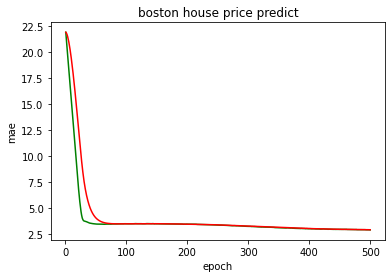

In [56]:
average_test_mae = [np.mean([x[i] for x in test_mae]) for i in range(epochs_num)]
plt.clf()
epochs = range(1, len(average_test_mae)+1)
#plt.plot(epochs, train_mae, 'bo-', color='red', label='train mae')
plt.plot(epochs, average_test_mae, 'b', color='green', label='test mae')
plt.plot(epochs, smooth_curve(average_test_mae), 'b', color='red', label='test mae')
plt.xlabel('epoch')
plt.ylabel('mae')
plt.title('boston house price predict')
plt.show()

In [ ]:
def